# ROS effects

In [1]:
using ModelingToolkit
using OrdinaryDiffEq
using Plots
using CaMKIIModel
using CaMKIIModel: second, μM
Plots.default(lw=1.5)

## Setup system
Electrical stimulation starts at `t`=100 seconds and ends at `t`=300 seconds.

In [2]:
sys = build_neonatal_ecc_sys(simplify=true, reduce_iso=true, reduce_camk=true)
tend = 500.0second
prob = ODEProblem(sys, [], tend)
stimstart = 100.0second
stimend = 300.0second
@unpack Istim = sys
alg = FBDF()

FBDF(; max_order = Val{5}(), linsolve = nothing, nlsolve = OrdinaryDiffEqNonlinearSolve.NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}, Rational{Int64}}(1//100, 10, 1//5, 1//5, false, true, 0//1), precs = DEFAULT_PRECS, κ = nothing, tol = nothing, extrapolant = linear, controller = Standard, step_limiter! = trivial_limiter!, autodiff = ADTypes.AutoForwardDiff(),)

## No ROS

In [3]:
callback = build_stim_callbacks(Istim, stimend; period=1second, starttime=stimstart)
@time sol = solve(prob, alg; callback)

  7.826060 seconds (19.44 M allocations: 969.288 MiB, 4.40% gc time, 76.73% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 42230-element Vector{Float64}:
      0.0
      1.397037556582821e-7
      9.238890872600831e-6
      8.268743701533588e-5
      0.0002916748356969014
      0.0017327691557383657
      0.0051472024471516595
      0.009381914366487651
      0.01412353770711788
      0.02222607464446686
      ⋮
 397723.82057004934
 406750.01662236196
 417776.8861123902
 430066.5613446226
 442356.23657685495
 454645.9118090873
 466935.5870413197
 481624.081564708
 500000.0
u: 42230-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.002599999989610171, 829.9999999963668, 829.9999999997507, 0.00702000000187161, 0.9660000000132074, 0.2215600000288606, 0.09242999998313912, 0.0018799999988577344, 0.009769999999149391, 0.2608099999679793  …  0.12113, 0.12113, 0.12113, 0.12113, 0.121

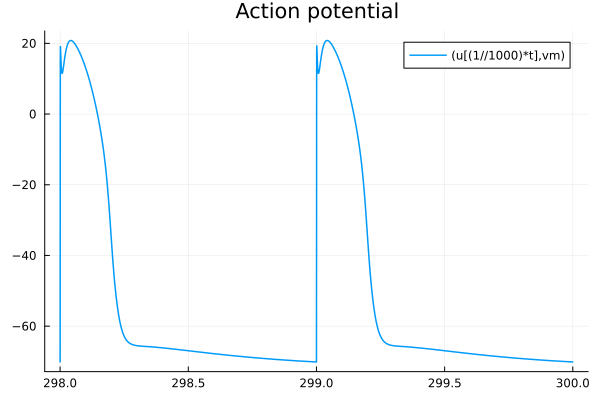

In [4]:
i = (sys.t / 1000, sys.vm)
tspan=(298second, 300second)
plot(sol, idxs=i, title="Action potential"; tspan)

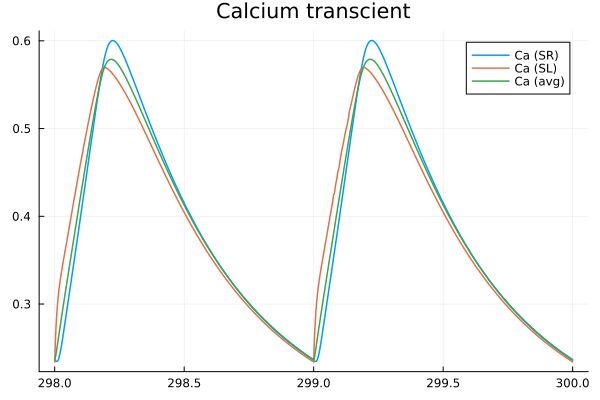

In [5]:
i = (sys.t / 1000, [sys.Cai_sub_SR, sys.Cai_sub_SL, sys.Cai_mean])
tspan=(298second, 300second)
plot(sol, idxs=i, title="Calcium transcient", label=["Ca (SR)" "Ca (SL)" "Ca (avg)"]; tspan)

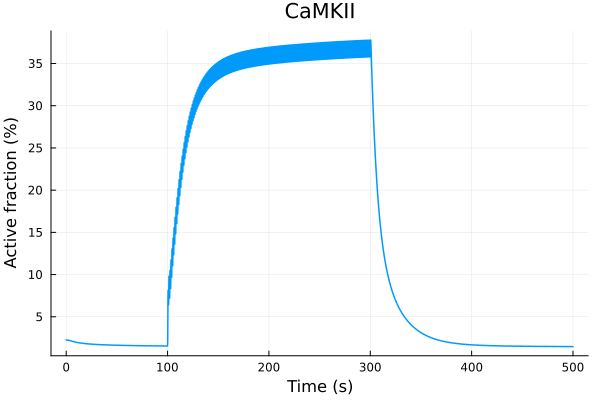

In [6]:
i = (sys.t / 1000,sys.CaMKAct*100)
plot(sol, idxs=i, title="CaMKII", xlabel="Time (s)", ylabel="Active fraction (%)", label=false)

## ROS 0.1uM

In [7]:
prob2 = remake(prob, p=[sys.ROS => 0.1μM])
@time sol2 = solve(prob2, alg; callback)

  1.761498 seconds (376.24 k allocations: 89.328 MiB, 2.52% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 42215-element Vector{Float64}:
      0.0
      1.397037556582838e-7
      9.238890871986907e-6
      8.268743700514583e-5
      0.0002916748356526253
      0.0017327691556185654
      0.0051472024469624384
      0.009381914366262189
      0.014123537706870255
      0.022226074644188173
      ⋮
 389265.38591577497
 399353.8858705601
 411007.8529809611
 422661.8200913621
 436206.5947048474
 452377.14901269105
 470412.8286545167
 486858.11591772886
 500000.0
u: 42215-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.002599999989610171, 829.9999999963668, 829.9999999997507, 0.007020000001871609, 0.9660000000132074, 0.2215600000288606, 0.09242999998313911, 0.0018799999988577344, 0.009769999999149393, 0.2608099999679794  …  0.12113, 0.12113, 0.12113, 0.12113, 0

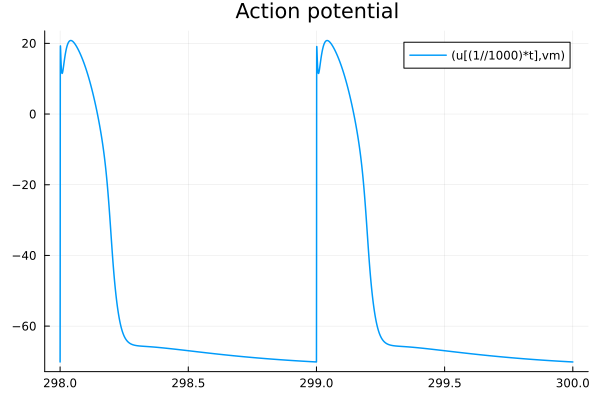

In [8]:
i = (sys.t / 1000, sys.vm)
tspan=(298second, 300second)
plot(sol2, idxs=i, title="Action potential"; tspan)

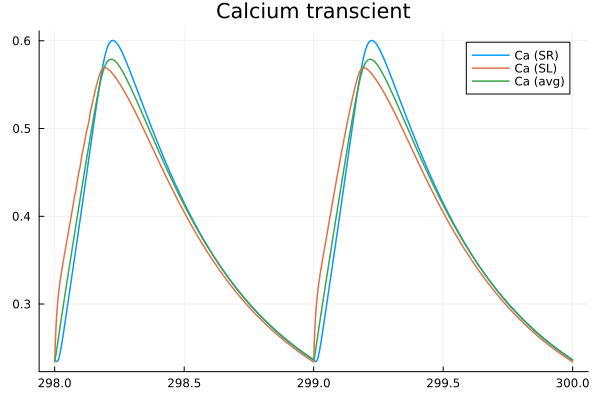

In [9]:
i = (sys.t / 1000, [sys.Cai_sub_SR, sys.Cai_sub_SL, sys.Cai_mean])
tspan=(298second, 300second)
plot(sol2, idxs=i, title="Calcium transcient", label=["Ca (SR)" "Ca (SL)" "Ca (avg)"]; tspan)

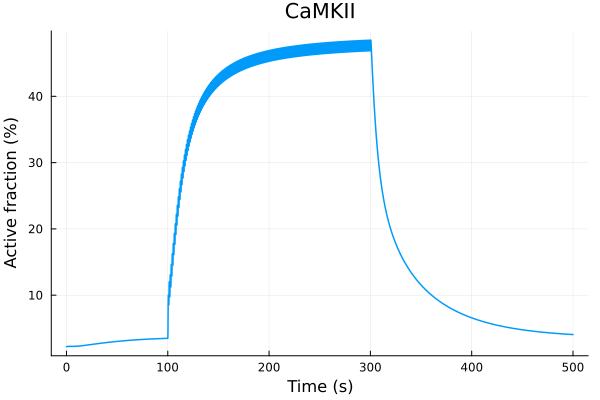

In [10]:
i = (sys.t / 1000,sys.CaMKAct*100)
plot(sol2, idxs=i, title="CaMKII", xlabel="Time (s)", ylabel="Active fraction (%)", label=false)

## ROS 1uM

In [11]:
prob3 = remake(prob, p=[sys.ROS => 1μM])
@time sol3 = solve(prob3, alg; callback)

  1.692673 seconds (376.26 k allocations: 89.285 MiB, 2.08% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 42186-element Vector{Float64}:
      0.0
      1.3970375565856293e-7
      9.23889078831287e-6
      8.26874359097889e-5
      0.0002916748311845054
      0.001732769143620915
      0.005147202427712317
      0.009381914343437936
      0.014123537681881076
      0.022226074616217326
      ⋮
 382027.1353878288
 392293.568556618
 402560.0017254072
 412826.4348941964
 423092.8680629856
 439690.1616059812
 460878.47559849976
 482066.78959101834
 500000.0
u: 42186-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.002599999989610171, 829.9999999963668, 829.9999999997507, 0.00702000000187161, 0.9660000000132074, 0.22156000002886056, 0.09242999998313912, 0.0018799999988577344, 0.009769999999149391, 0.2608099999679794  …  0.12113, 0.12113, 0.12113, 0.12113, 0.1211

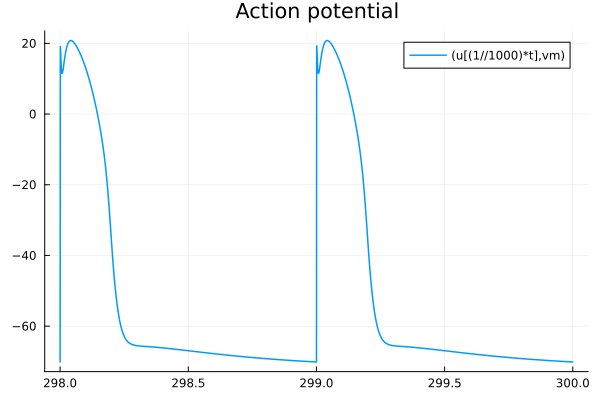

In [12]:
i = (sys.t / 1000, sys.vm)
tspan=(298second, 300second)
plot(sol3, idxs=i, title="Action potential"; tspan)

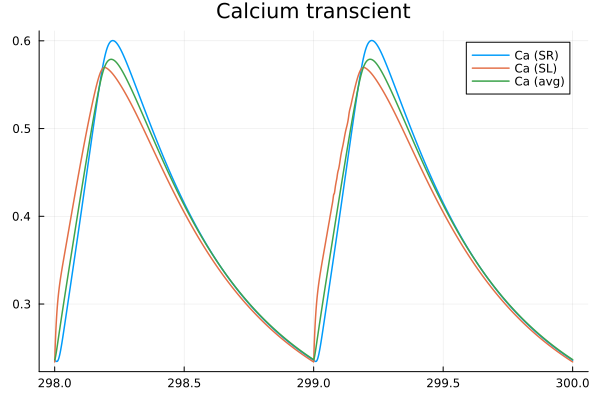

In [13]:
i = (sys.t / 1000, [sys.Cai_sub_SR, sys.Cai_sub_SL, sys.Cai_mean])
tspan=(298second, 300second)
plot(sol3, idxs=i, title="Calcium transcient", label=["Ca (SR)" "Ca (SL)" "Ca (avg)"]; tspan)

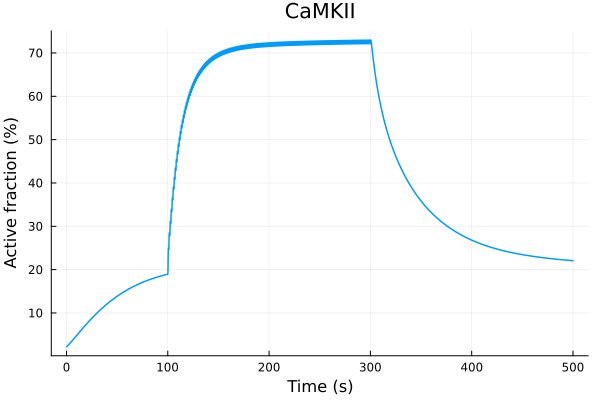

In [14]:
i = (sys.t / 1000,sys.CaMKAct*100)
plot(sol3, idxs=i, title="CaMKII", xlabel="Time (s)", ylabel="Active fraction (%)", label=false)

## Comparisons

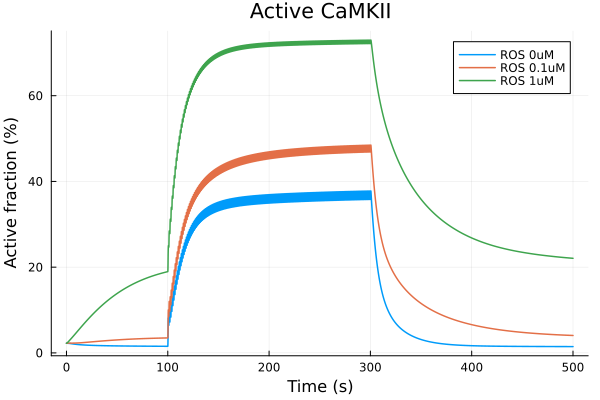

In [15]:
i = (sys.t / 1000,sys.CaMKAct*100)
plot(sol, idxs=i, title="Active CaMKII", lab="ROS 0uM")
plot!(sol2, idxs=i, lab="ROS 0.1uM")
plot!(sol3, idxs=i, lab="ROS 1uM", xlabel="Time (s)", ylabel="Active fraction (%)")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*